<a href="https://colab.research.google.com/github/Varun-Singhal/Neural-Network/blob/master/CNN_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


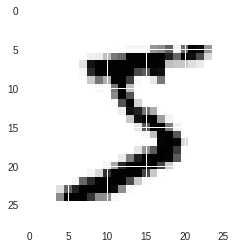

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
print(X_train[0,0,:].T)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(filters=32,kernel_size=(3,3),padding='same',  activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(filters=35, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Convolution2D(filters=40, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Convolution2D(filters=43, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 26, 26, 35)        10115     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 35)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 26, 26, 40)        12640     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 43)        15523     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 43)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2752)              0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.1228 - acc: 0.9627
Epoch 2/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0442 - acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0329 - acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0257 - acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0205 - acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0171 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0142 - acc: 0.9957
Epoch 8/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0129 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0104 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 22s 364us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.036553325986456005, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.3548688e-11 2.6431735e-15 7.4573950e-07 8.3959485e-08 1.3543033e-14
  1.0072403e-12 3.2912218e-18 9.9999917e-01 9.7919407e-12 1.6351278e-08]
 [7.5571369e-13 5.2197435e-12 1.0000000e+00 7.2929494e-15 1.9706862e-17
  1.3641844e-18 5.8579513e-10 9.0116927e-18 1.7494517e-13 3.5652343e-13]
 [2.4892337e-08 9.9996126e-01 5.1602996e-07 4.7098220e-10 4.3444611e-06
  9.6630856e-07 1.7311961e-05 6.2710114e-06 9.3653061e-06 1.4852502e-08]
 [1.0000000e+00 2.1919663e-20 2.1866907e-10 2.4357007e-14 2.2373788e-16
  1.1689414e-09 2.0568308e-08 1.6833516e-14 2.3261700e-11 4.2491738e-10]
 [5.8411986e-12 1.6735115e-13 5.0272877e-13 2.5597435e-15 1.0000000e+00
  8.9532973e-12 6.5422006e-14 3.5494773e-14 1.0393894e-11 9.3230144e-09]
 [9.0232483e-08 9.9979633e-01 6.1664298e-07 1.7137932e-09 1.6298718e-05
  6.6280222e-07 9.8797193e-07 1.5660151e-04 2.7911206e-05 4.1716075e-07]
 [2.7750194e-20 7.1327427e-13 7.2053301e-11 2.3773936e-15 9.9999988e-01
  1.2562329e-10 1.1657560e-15 1.9700588e-13 7.6732363e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored